<a href="https://colab.research.google.com/github/SanandhKumar02/MiniProject_ProstateCancer/blob/main/MiniProject_R_ProstateCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prostate Cancer Biomarker Identification using Machine learning**

## Analysis of TCGA gene expression dataset for Prostate Cancer.
The goal of this analysis is to find differences in gene expression profiles between the two sample populations: normal cells vs cancer cells. The two groups will be compared through an analysis of a gene expression dataset downloaded from The Cancer Genome Atlas (TCGA). The dataset contains expression values (sequence counts) generated via the Illumina HiSeq platform.

In [1]:
if (!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
BiocManager::install("TCGAbiolinks")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Installing package(s) 'BiocVersion', 'TCGAbiolinks'

also installing the dependencies ‘plogr’, ‘png’, ‘Biostrings’, ‘bitops’, ‘RSQLite’, ‘KEGGREST’, ‘filelock’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘AnnotationDbi’, ‘BiocFileCache’, ‘BiocGenerics’, ‘GenomeInfoDb’, ‘XVector’, ‘Rcpp’, ‘R.oo’, ‘R.methodsS3’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘downloader’, ‘biomaRt’, ‘GenomicRanges’, ‘XML’, ‘plyr’, ‘IRanges’, ‘S4Vectors’, ‘R.utils’, ‘SummarizedExperiment’, ‘TCGAbiolinksGUI.data’


Old packages: 'openssl', 'roxygen2', 'tinytex', 'usethis', 'xfun'



In [3]:
library(TCGAbiolinks)

In [4]:
library(SummarizedExperiment)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

In [5]:
library(ggplot2)

In [6]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Installing package(s) 'DESeq2'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘xtable’, ‘futile.logger’, ‘snow’, ‘BH’, ‘annotate’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


Old packages: 'openssl', 'roxygen2', 'tinytex', 'usethis', 'xfun'



In [7]:
library(DESeq2)

## Function for Identifiying Upregulated and Downregulated genes

In [8]:
get_upregulated <- function(df){
    key <- intersect(rownames(df)[which(df$log2FoldChange>=1)],
              rownames(df)[which(df$pvalue<=0.05)])
    
    results <- as.data.frame((df)[which(rownames(df) %in% key),])
    return(results)
  }

In [9]:
get_downregulated <- function(df){
  key <- intersect(rownames(df)[which(df$log2FoldChange<=-1)],
            rownames(df)[which(df$pvalue<=0.05)])
  
  results <- as.data.frame((df)[which(rownames(df) %in% key),])
  return(results)
}

## Downlading and Data wrangling

In [10]:
query <- GDCquery(project = "TCGA-PRAD", 
                  data.category = "Gene expression",
                  data.type = "Gene expression quantification",
                  experimental.strategy = "RNA-Seq",
                  platform = "Illumina HiSeq",
                  file.type = "results",
                  legacy = TRUE)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg19

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-PRAD

--------------------

oo Filtering results

--------------------

ooo By platform

ooo By experimental.strategy

ooo By data.type

ooo By file.type

----------------

oo Checking data

----------------

ooo Check if there are duplicated cases

ooo Check if there results for the query

-------------------

o Preparing output

-------------------



In [11]:
GDCdownload(query, method = "api", files.per.chunk = 100,
            directory = "/content/Data")


GDCdownload will download 550 files. A total of 834.121914 MB




Downloading: 61 MB     

Downloading: 61 MB     

Downloading: 61 MB     

Downloading: 61 MB     

Downloading: 61 MB     

Downloading: 30 MB     

In [12]:
mrna_df <- GDCprepare(query, directory = "/content/Data")

--------------------

oo Reading 550 files

--------------------



|====================================================|100%                      Completed after 20 s 


--------------------

oo Merging 550 files

--------------------

Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

prad subtype information from:doi:10.1016/j.cell.2015.10.025

Available assays in SummarizedExperiment : 
  => raw_count
  => scaled_estimate



In [13]:
### remove columns we dont need, keep counts
mrna_meta <- mrna_df$sample
mrna_meta <- cbind(mrna_meta, mrna_df$definition)
mrna_df <- assay(mrna_df)

In [14]:
delim_fn = function(x, n, i){
    do.call(c, lapply(x, function(X)
        paste(unlist(strsplit(X, "-"))[(n+1):(i)], collapse = "-")))
}

In [15]:
colnames(mrna_df) <- delim_fn(x = colnames(mrna_df), n = 0, i = 4)

In [16]:
mrna_meta <- as.data.frame(mrna_meta)
mrna_df <- as.data.frame(mrna_df)

In [17]:
## Remove metastatic sample
metastatic_key <- mrna_meta[which(mrna_meta[,2] == "Metastatic"),]
mrna_meta <- mrna_meta[!mrna_meta[,2] == metastatic_key[,2],]
mrna_df <- mrna_df[, -grep(paste0(metastatic_key[,1]), colnames(mrna_df))]

In [18]:
mrna_meta[,2] <- as.character(mrna_meta[,2])

In [19]:
mrna_meta[,2] <- gsub("Primary solid Tumor", "Tumor", mrna_meta[,2])
mrna_meta[,2] <- gsub("Solid Tissue Normal", "Normal", mrna_meta[,2])
mrna_meta[,2] <- as.factor(mrna_meta[,2])
levels(mrna_meta[,2])
colnames(mrna_meta) <- c("cases", "Condition")

[1] "Normal" "Tumor"

## DESeq2 Analysis
### Summary of the Differential Expression Analysis Workflow:


1. Involves identifying genes whose expression levels change between two sample groups.
2. We begin by importing our dataset and necessary packages.
3. Then, we can reduce our dataset by filtering out all genes with zero values.
4. Next, we can split our dataset using regular expressions:


```
a) Expression values for cancer cells in one dataframe
b) Expression values for normal cells in another dataframe
```

5. Then we generate MetaData
6. After that we call the *DESeqDataSetFromMatrix* function and at last *DESeq* function to get the results

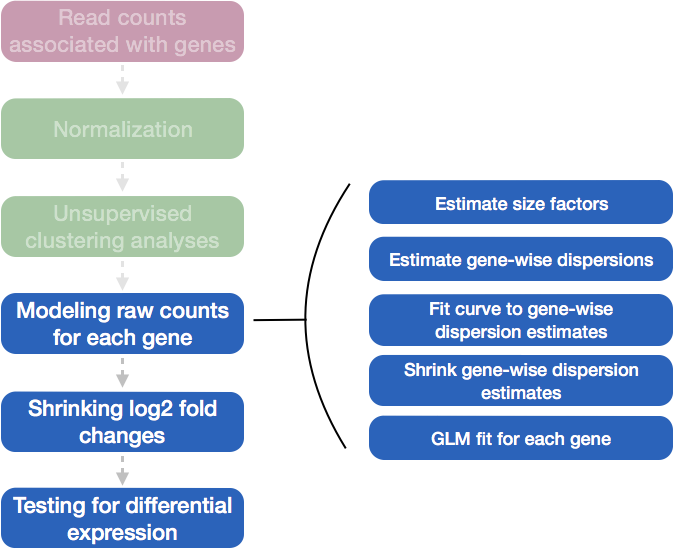

[link text](https://hbctraining.github.io/DGE_workshop/lessons/04_DGE_DESeq2_analysis.html)











In [20]:
mrna_dds <- DESeqDataSetFromMatrix(round(mrna_df), colData = mrna_meta, design = ~ Condition)

converting counts to integer mode



In [21]:
mrna_dds$Condition <- relevel(mrna_dds$Condition, ref = "Normal")

In [22]:
mrna_dds <- DESeq(mrna_dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1439 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [23]:
vsd <- varianceStabilizingTransformation(mrna_dds, blind=FALSE)

,TCGA-G9-7525-01A,TCGA-EJ-7789-01A,TCGA-EJ-7314-11A,TCGA-HC-8265-01A,TCGA-EJ-A46B-01A,TCGA-HC-7819-01A,TCGA-EJ-5510-01A,TCGA-HC-7080-01A,TCGA-CH-5769-11A,TCGA-KK-A7AY-01A,⋯,TCGA-G9-6377-01A,TCGA-V1-A8MF-01A,TCGA-G9-6499-11A,TCGA-J4-A67R-01A,TCGA-KK-A6E7-01A,TCGA-J9-A8CN-01A,TCGA-CH-5762-01A,TCGA-XJ-A9DX-01A,TCGA-KK-A6E5-01A,TCGA-EJ-5496-01A
A1BG|1,6.008894,7.355672,7.672604,7.907780,7.380921,6.189704,6.560988,5.889730,6.145200,6.520872,⋯,6.584258,6.959848,6.889952,7.406567,6.830122,6.074995,5.411722,8.238785,7.448119,5.840184
A2M|2,14.977996,14.768960,16.052200,14.783020,13.568532,13.518895,14.263595,14.022247,14.657321,14.457274,⋯,13.784273,14.996586,15.086310,14.495920,14.170037,14.425412,15.190929,13.686582,14.506364,13.316533
NAT1|9,7.369287,5.967220,8.657079,8.214435,9.172845,5.967724,8.689489,6.183797,8.645634,5.524921,⋯,8.042378,8.220037,9.312656,7.235903,9.267809,9.088459,7.819305,5.980150,9.675646,7.288150
NAT2|10,5.153428,4.052769,5.213812,4.687886,5.166692,4.522975,5.095599,5.115032,5.176564,4.514181,⋯,4.859166,5.722875,5.025388,5.173697,6.807294,4.465588,4.052769,4.052769,4.774214,4.706704
SERPINA3|12,16.425500,8.755545,14.887241,16.042970,10.837725,14.793632,15.035991,12.389362,15.395851,12.833889,⋯,15.029958,10.727668,14.168768,16.990727,10.022932,14.148247,13.947195,10.260316,12.506878,14.000804
AADAC|13,4.408430,4.052769,4.558712,4.052769,4.052769,4.052769,4.359825,4.052769,4.521184,4.052769,⋯,4.052769,4.052769,4.052769,4.591437,4.518895,4.052769,4.052769,4.052769,4.416300,4.052769


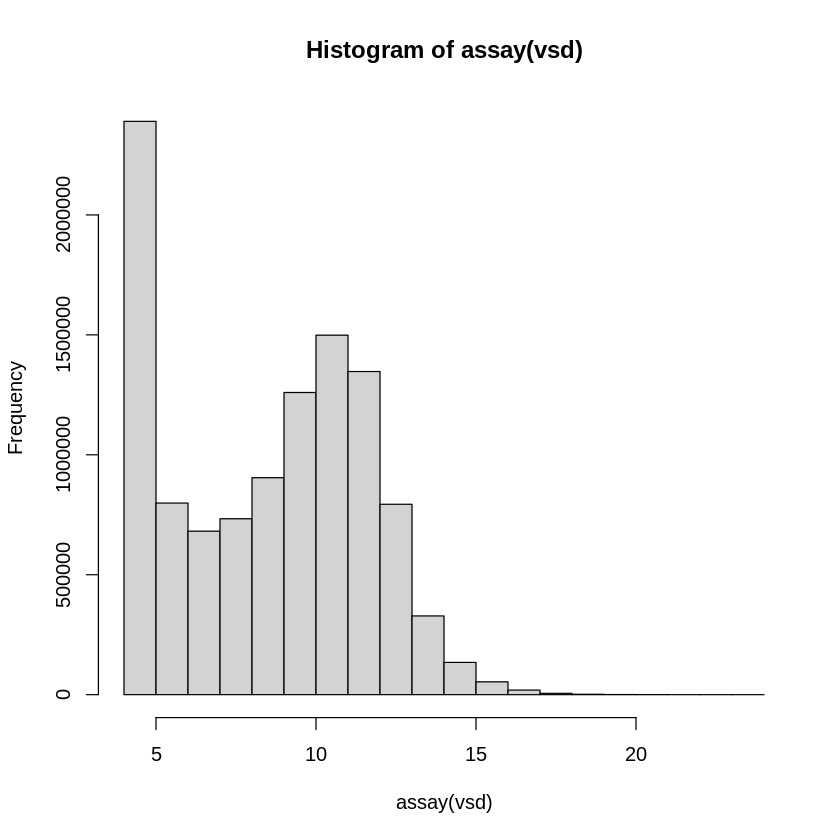

In [24]:
head(assay(vsd))
hist(assay(vsd))

In [25]:
resultsNames(mrna_dds)

[1] "Intercept"                 "Condition_Tumor_vs_Normal"

## Dispersions Plot 

null device 
          1

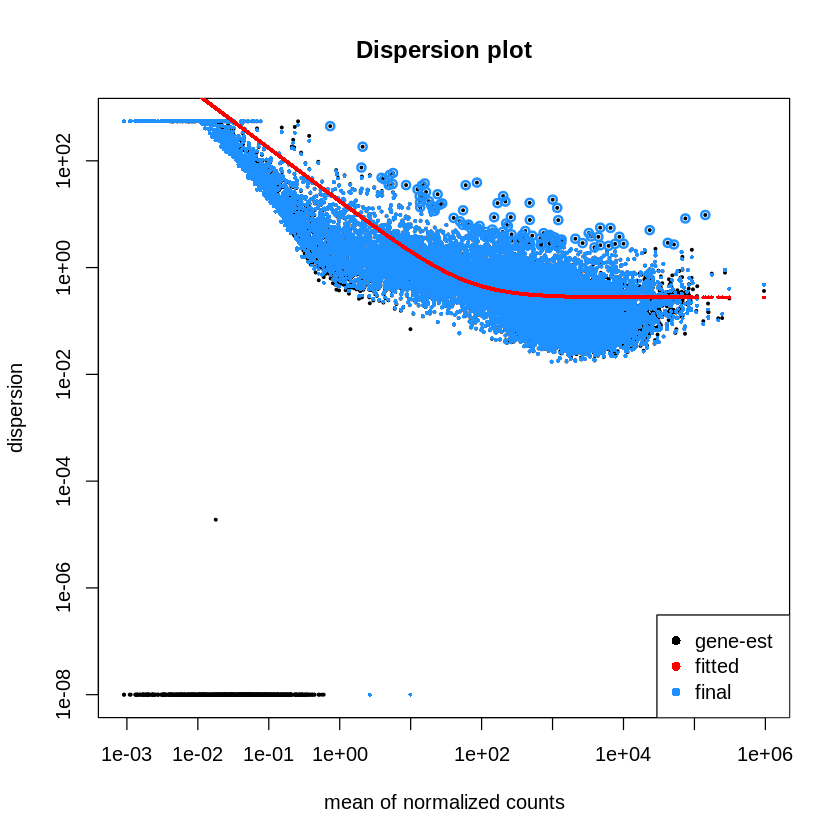

In [26]:
# Plot Dispersions:
plotDispEsts(mrna_dds, main="Dispersion plot")
dev.off()

In [27]:
mrna_res <- results(mrna_dds, name = "Condition_Tumor_vs_Normal")

## MA Plot

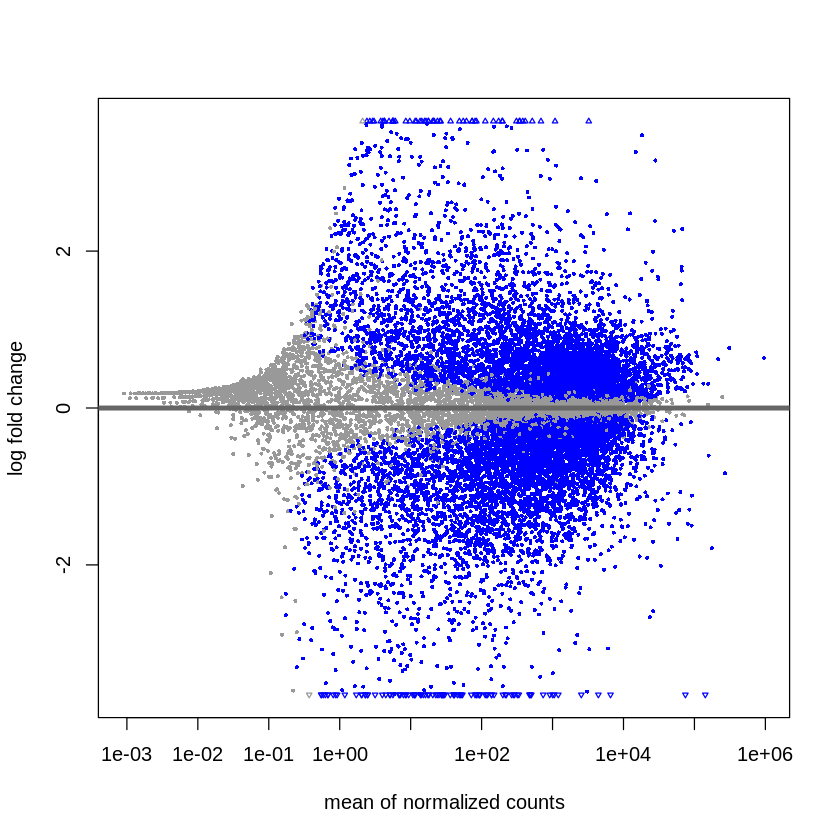

In [28]:
plotMA(mrna_res)

## Summing Up

In [29]:
mrna_res_df <- as.data.frame(mrna_res)

In [30]:
mrnaTable <- mrna_res_df

In [31]:
mrnaTable$Gene_id <- rownames(mrnaTable)

In [32]:
summary(mrna_res)


out of 19669 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 6878, 35%
LFC < 0 (down)     : 6338, 32%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [33]:
mrna_upreg <- get_upregulated(mrna_res)

In [34]:
mrna_downreg <- get_downregulated(mrna_res)

In [35]:
mrna_counts <- counts(mrna_dds, normalized = T)

In [36]:
mrna_upreg$Gene_id <- rownames(mrna_upreg)

In [37]:
mrna_downreg$Gene_id <- rownames(mrna_downreg)

In [38]:
mrna_res_df$Gene_id <- rownames(mrna_res_df)

In [ ]:
#txt Format

write.table(mrna_counts, "/content/Results/mRNA_norm.counts.txt", quote = F, sep = "\t")
write.table(mrna_res_df, "/content/Results/mrna_res_deseq2.txt", quote = F, sep = "\t")
write.table(mrna_upreg, "/content/Results/mRNA_upreg.txt", quote = F, sep = "\t", row.names = F)
write.table(mrna_downreg, "/content/Results/mRNA_downreg.txt", quote = F, sep = "\t", row.names = F)

#CSV Format

write.csv(as.data.frame(mrna_upreg), file="mrna_upreg.csv")
write.csv(as.data.frame(mrna_downreg), file="mrna_downreg.csv")
write.csv(as.data.frame(mrna_counts), file="mrna_counts.csv")
write.csv(as.data.frame(mrna_res_df), file="mrna_res_df.csv")

## Volcano Plot

In [39]:
par(mar=c(5,5,5,5), cex=1.0, cex.main=1.4, cex.axis=1.4, cex.lab=1.4)

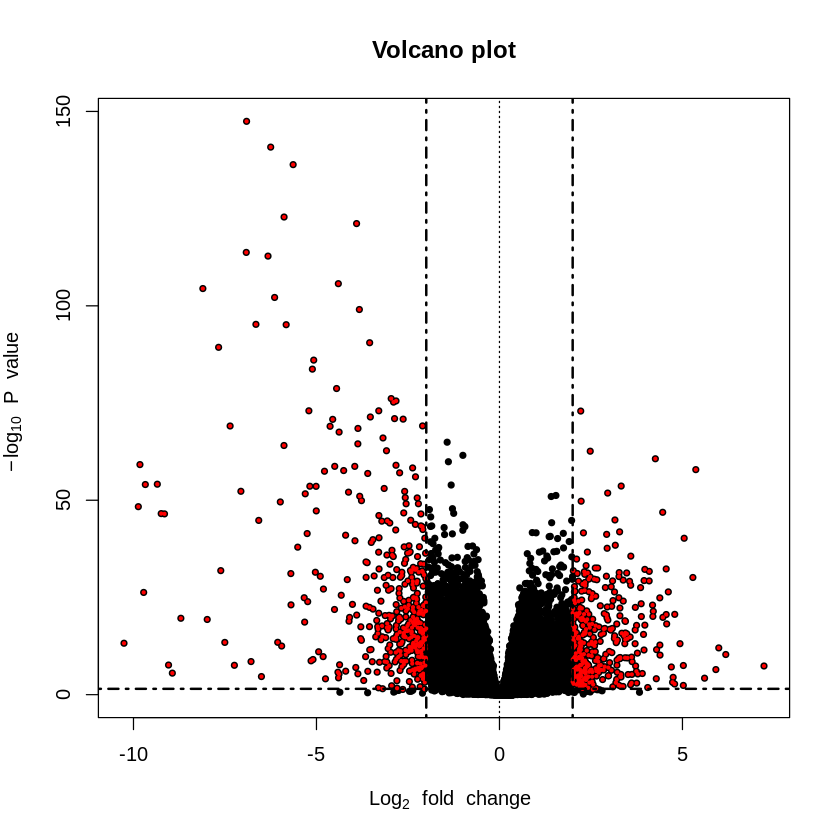

In [42]:
with(mrna_res_df, plot(log2FoldChange, -log10(padj), pch=20, main="Volcano plot", cex=1.0, xlab=bquote(~Log[2]~fold~change), ylab=bquote(~-log[10]~P~value)))

with(subset(mrna_res_df, padj<0.05 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(padj), pch=20, col="red", cex=0.5))

#with(subset(mrna_res_df, padj<0.05 & abs(log2FoldChange)>2), text(log2FoldChange, -log10(padj), labels=subset(rownames(mrna_res_df), mrna_res_df$padj<0.05 & abs(mrna_res_df$log2FoldChange)>2), cex=0.8, pos=3))

#Add lines for absolute FC>2 and P-value cut-off at FDR Q<0.05
abline(v=0, col="black", lty=3, lwd=1.0)
abline(v=-2, col="black", lty=4, lwd=2.0)
abline(v=2, col="black", lty=4, lwd=2.0)
abline(h=-log10(max(mrna_res_df$pvalue[mrna_res_df$padj<0.05], na.rm=TRUE)), col="black", lty=4, lwd=2.0)

# CONCLUSION
The set of genes found to be differentially expressed, namely ANGPT1, CHRM2, HSPA6, KIRREL3, C2orf88, SMR3A, CIDEC, ZNF185, FAM167A, APOBEC3C, EPHA10, HOXC4, NETO2, GTSE1, NETO1, KISS1R, TEKT1, ACTL8, ROPN1L, could be deduced from the above results. The genes ANGPT1, APOBEC3C, ZNF185, EPHA10, and HOXC4 have the potential to be used as diagnostic tests for prostate cancer early detection. These genes will need to be studied further to see if they may be fused with other genes to boost their selectivity and specificity. Because prostate cancer is a potentially fatal malignancy for the majority of men who are diagnosed with it, the only way to solve this issue is through early detection and accurate prognosis, which is what our research attempts to achieve.